# LDA-Enhanced KNN Classification for House Price Prediction

## 1. Objective
Apply Linear Discriminant Analysis (LDA) to reduce dimensions before performing KNN classification. Identify an optimal K value, train the model, and compare results with and without dimensionality reduction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import ML_Modules
import warnings

warnings.filterwarnings('ignore')

## 2. Dataset Loading and Initial Preprocessing

In [2]:
# Load the dataset
df = pd.read_excel('ML470_S9_KCHouse_Data_Practice.xlsx')

# Categorize house prices into quartiles
df['price_range'] = pd.qcut(df['price'], q=4, labels=['Low', 'Mid', 'Upper-Mid', 'High'])

# Encode the labels
le = LabelEncoder()
df['price_range_encoded'] = le.fit_transform(df['price_range'])

# Clean and prepare data
df_clean = df.drop(['id', 'date', 'price_range'], axis=1)

# Treat outliers in numerical features
df_treated = ML_Modules.treat_outliers(df_clean)

# Resolve multicollinearity
df_selected = df_treated.drop(['sqft_living', 'sqft_lot', 'price'], axis=1)

print("Preprocessing completed.")
df_selected.head()

Preprocessing completed.


,bedrooms,floors,grade,sqft_above,sqft_living15,sqft_lot15,price_range_encoded
0,3.0,1.0,7.0,1180.0,1340.0,5650.0,1.0
1,3.0,2.0,7.0,2170.0,1690.0,7639.0,3.0
2,2.0,1.0,6.0,770.0,2720.0,8062.0,1.0
3,4.0,1.0,7.0,1050.0,1360.0,5000.0,3.0
4,3.0,1.0,8.0,1680.0,1800.0,7503.0,3.0


## 3. Apply LDA and Find Optimal K

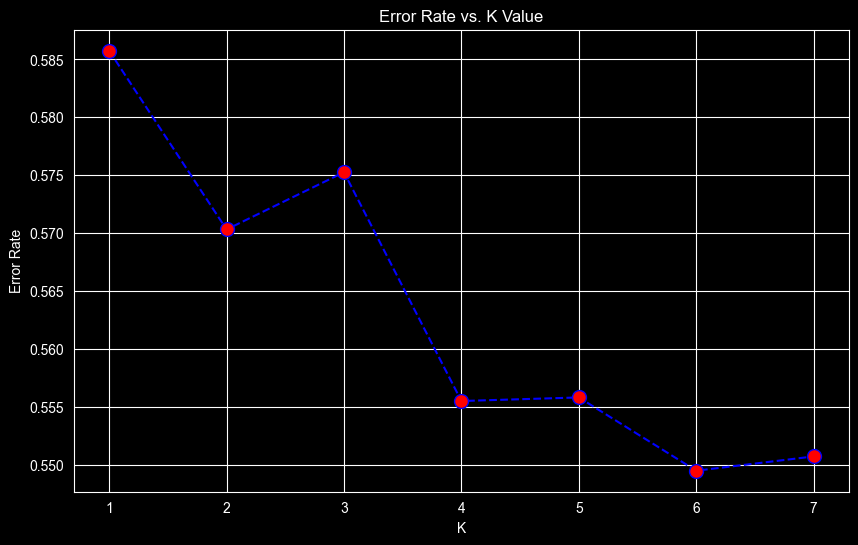

In [3]:
# Separate Features and Target
X = df_selected.drop('price_range_encoded', axis=1)
y = df_selected['price_range_encoded']

# Scale the features
X_scaled = ML_Modules.data_scale(X)

# Apply LDA (2 components)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Split the LDA-transformed data
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.3, random_state=42)

# Find optimal K (1 to 7)
error_rate = []
for i in range(1, 8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_lda, y_train_lda)
    pred_i = knn.predict(X_test_lda)
    error_rate.append(np.mean(pred_i != y_test_lda))

# Plot Error Rate vs. K Value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), error_rate, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

## 4. Build and Evaluate Final LDA-based KNN Classifier

In [4]:
# Identify optimal K
best_k = error_rate.index(min(error_rate)) + 1
print(f"Optimal K value: {best_k}")

# Train final model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_lda, y_train_lda)

# Make predictions
y_pred_lda = knn_final.predict(X_test_lda)
y_prob_lda = knn_final.predict_proba(X_test_lda)

# Results
print("
LDA-Enhanced KNN Classification Results:")
print(f"Accuracy:  {accuracy_score(y_test_lda, y_pred_lda):.4f}")
print(f"Precision: {precision_score(y_test_lda, y_pred_lda, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test_lda, y_pred_lda, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_test_lda, y_pred_lda, average='weighted'):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test_lda, y_prob_lda, multi_class='ovr', average='weighted'):.4f}")

SyntaxError: unterminated string literal (detected at line 14) (607967187.py, line 14)